In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import re

C:\Users\dangy\AppData\Local\Temp\ipykernel_20992\3155708405.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
JSON_DIR = Path("data/json")
with open(JSON_DIR / "fashion_2023.json") as f:
    company_data = json.load(f)
with open(JSON_DIR / "max_scores.json") as f:
    max_scores = json.load(f)
with open(JSON_DIR / "fashion_2023_normalized.json") as f:
    normalized_data = json.load(f)

In [3]:
df = pd.DataFrame(columns=["company", "subcategory", "normalized"])
for company in normalized_data:
    for category, value in company["subcategories"].items():
        if "normalized" in value:
            normalized = value["normalized"]
            category = re.search(r"\d\.\d", category).group()
            df.loc[len(df.index)] = [company["Company"], category, normalized]


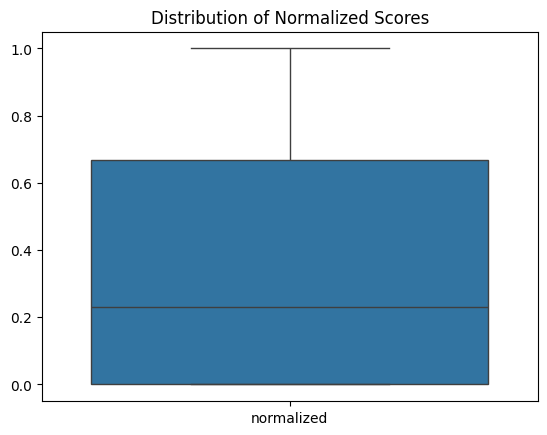

In [12]:
sns.boxplot(data=df)
plt.title('Distribution of Normalized Scores')
plt.show()

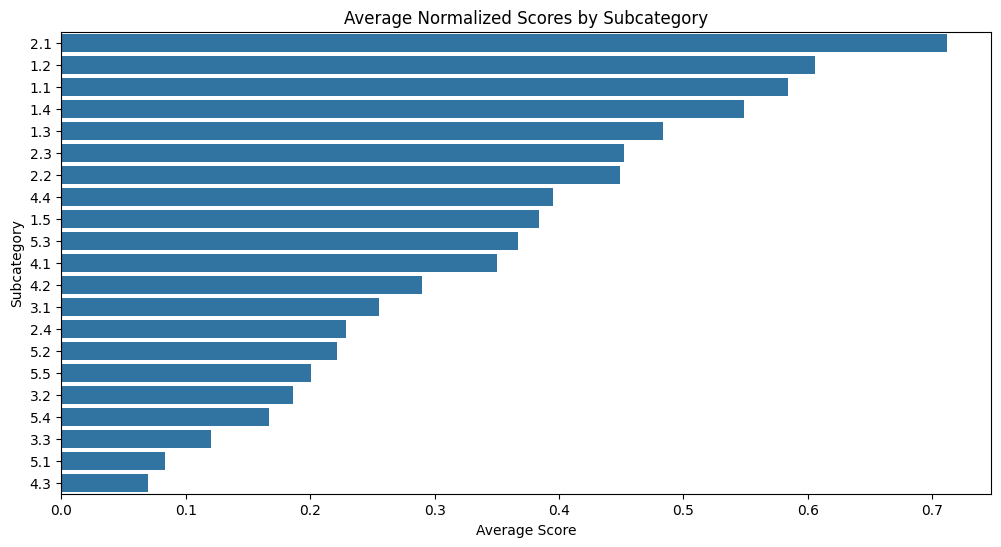

In [5]:
avg_scores = df.groupby('subcategory')['normalized'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='normalized', y='subcategory', data=avg_scores.sort_values('normalized', ascending=False))
plt.title('Average Normalized Scores by Subcategory')
plt.xlabel('Average Score')
plt.ylabel('Subcategory')
plt.show()

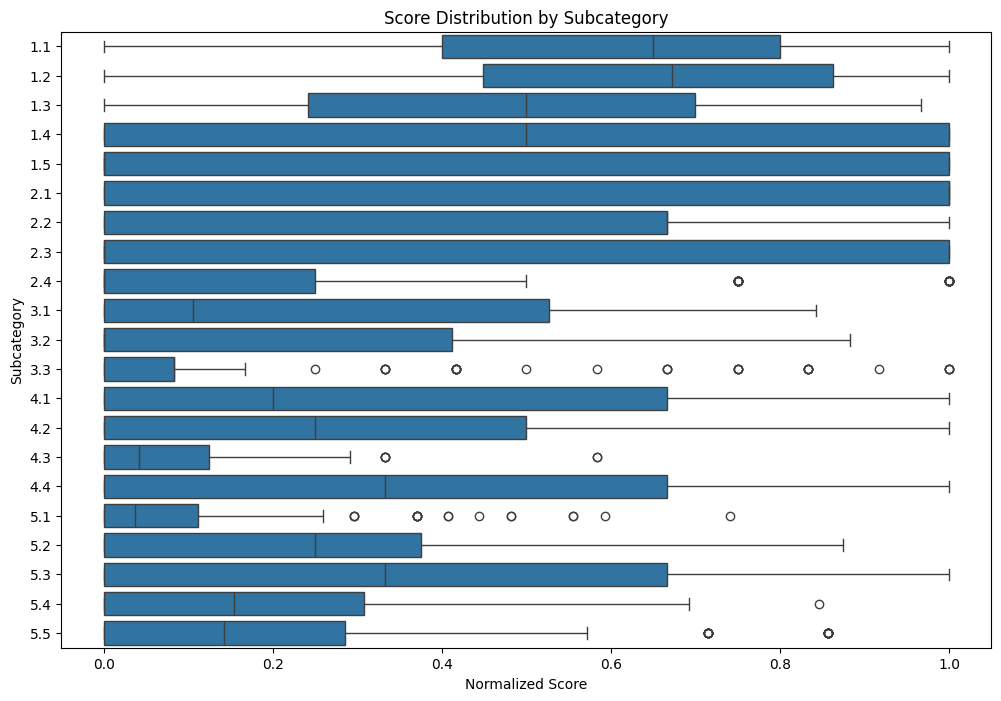

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='normalized', y='subcategory', data=df)
plt.title('Score Distribution by Subcategory')
plt.xlabel('Normalized Score')
plt.ylabel('Subcategory')
plt.show()


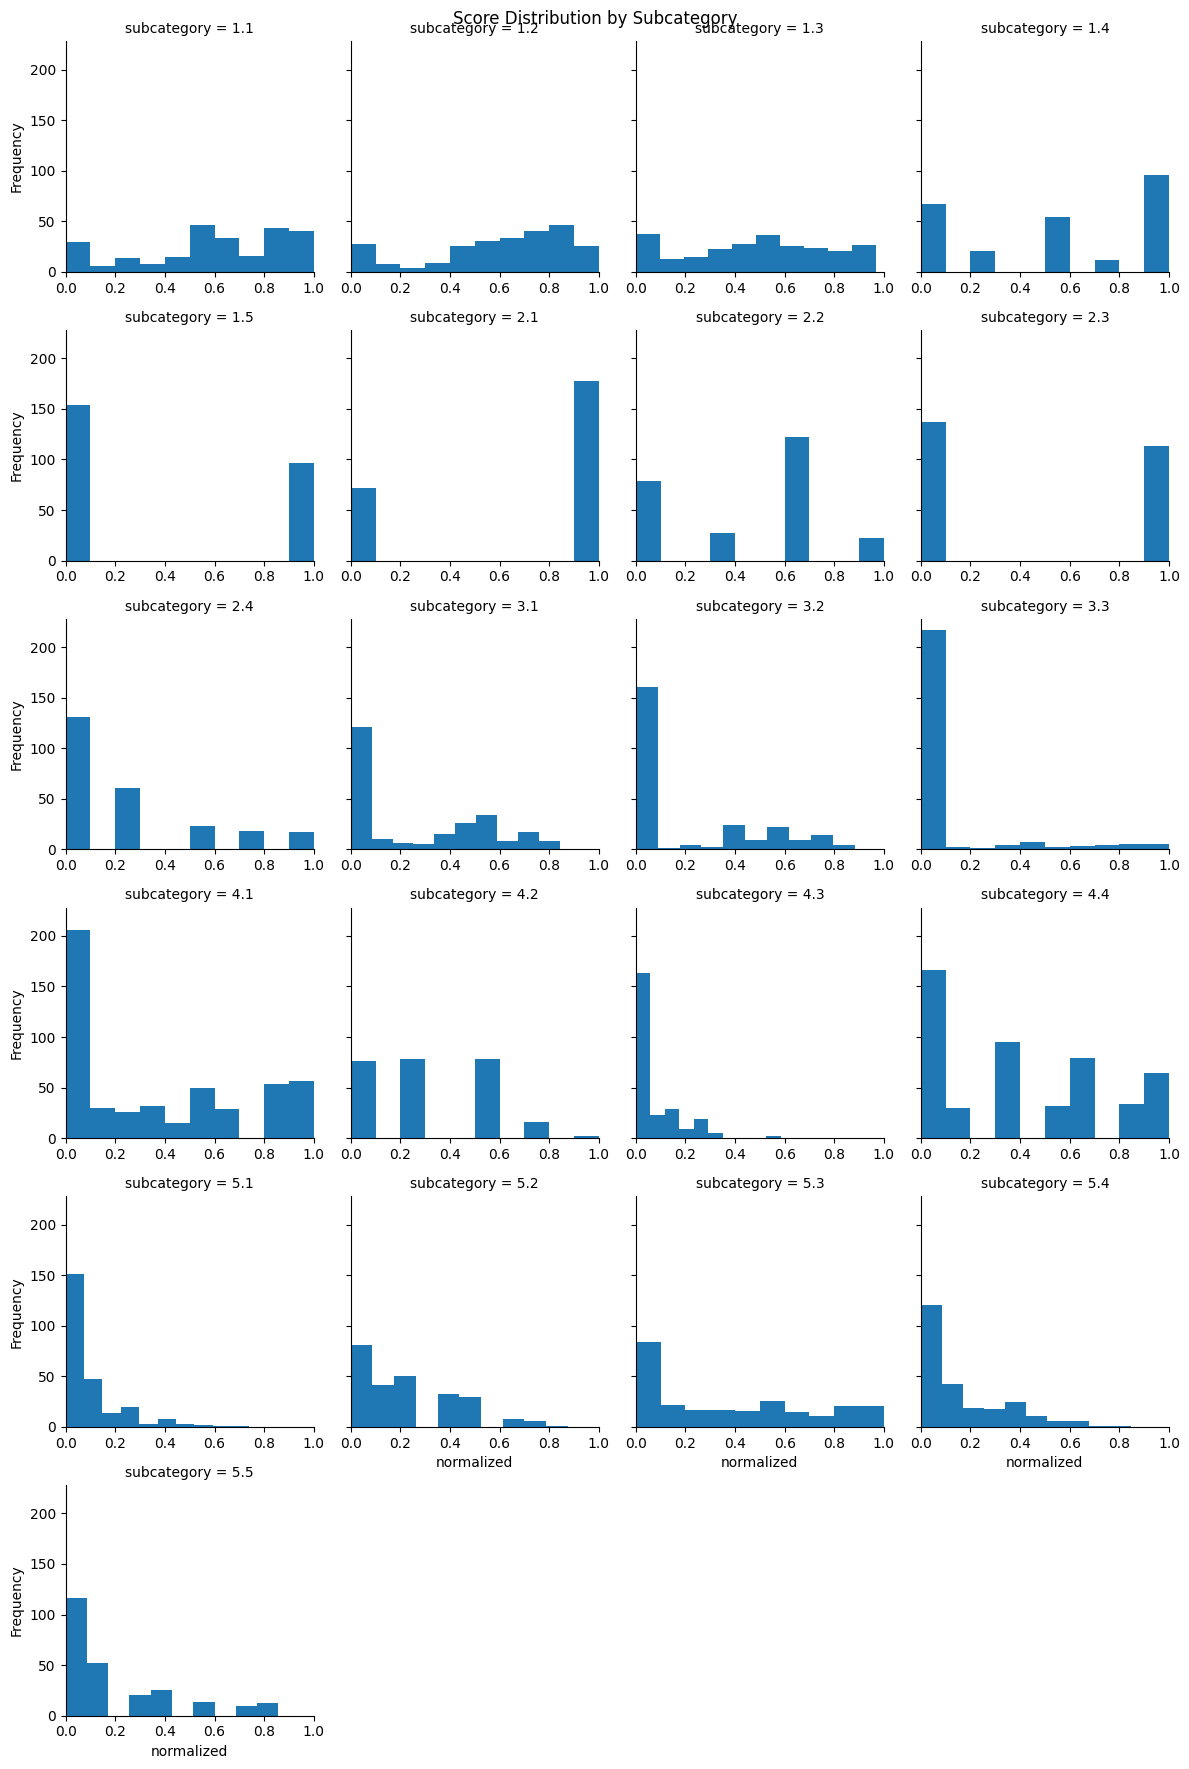

In [7]:
g = sns.FacetGrid(df, col='subcategory', col_wrap=4, sharex=False, sharey=True)
g.set(xlabel='Normalized Score')
g.set(ylabel='Frequency')
g.fig.suptitle('Score Distribution by Subcategory')
g.set(xlim=(0, 1))
g.map(plt.hist, 'normalized', bins=10)
plt.show()


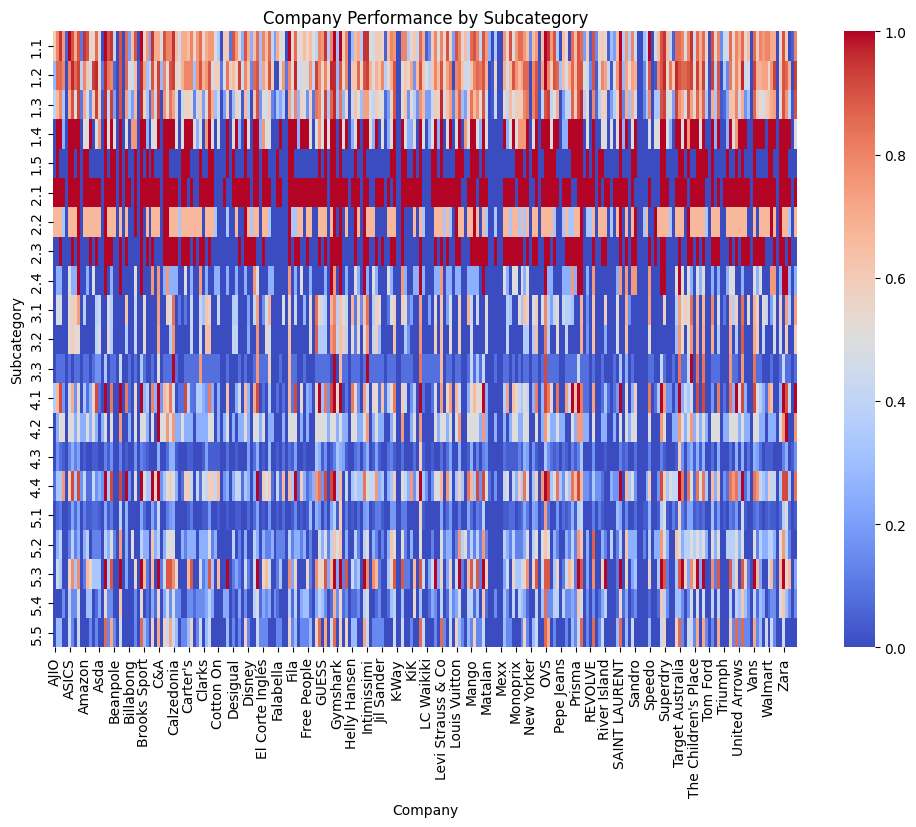

In [8]:
pivot_df = df.pivot_table(index='subcategory', columns='company', values='normalized', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Company Performance by Subcategory')
plt.xlabel('Company')
plt.ylabel('Subcategory')
plt.show()

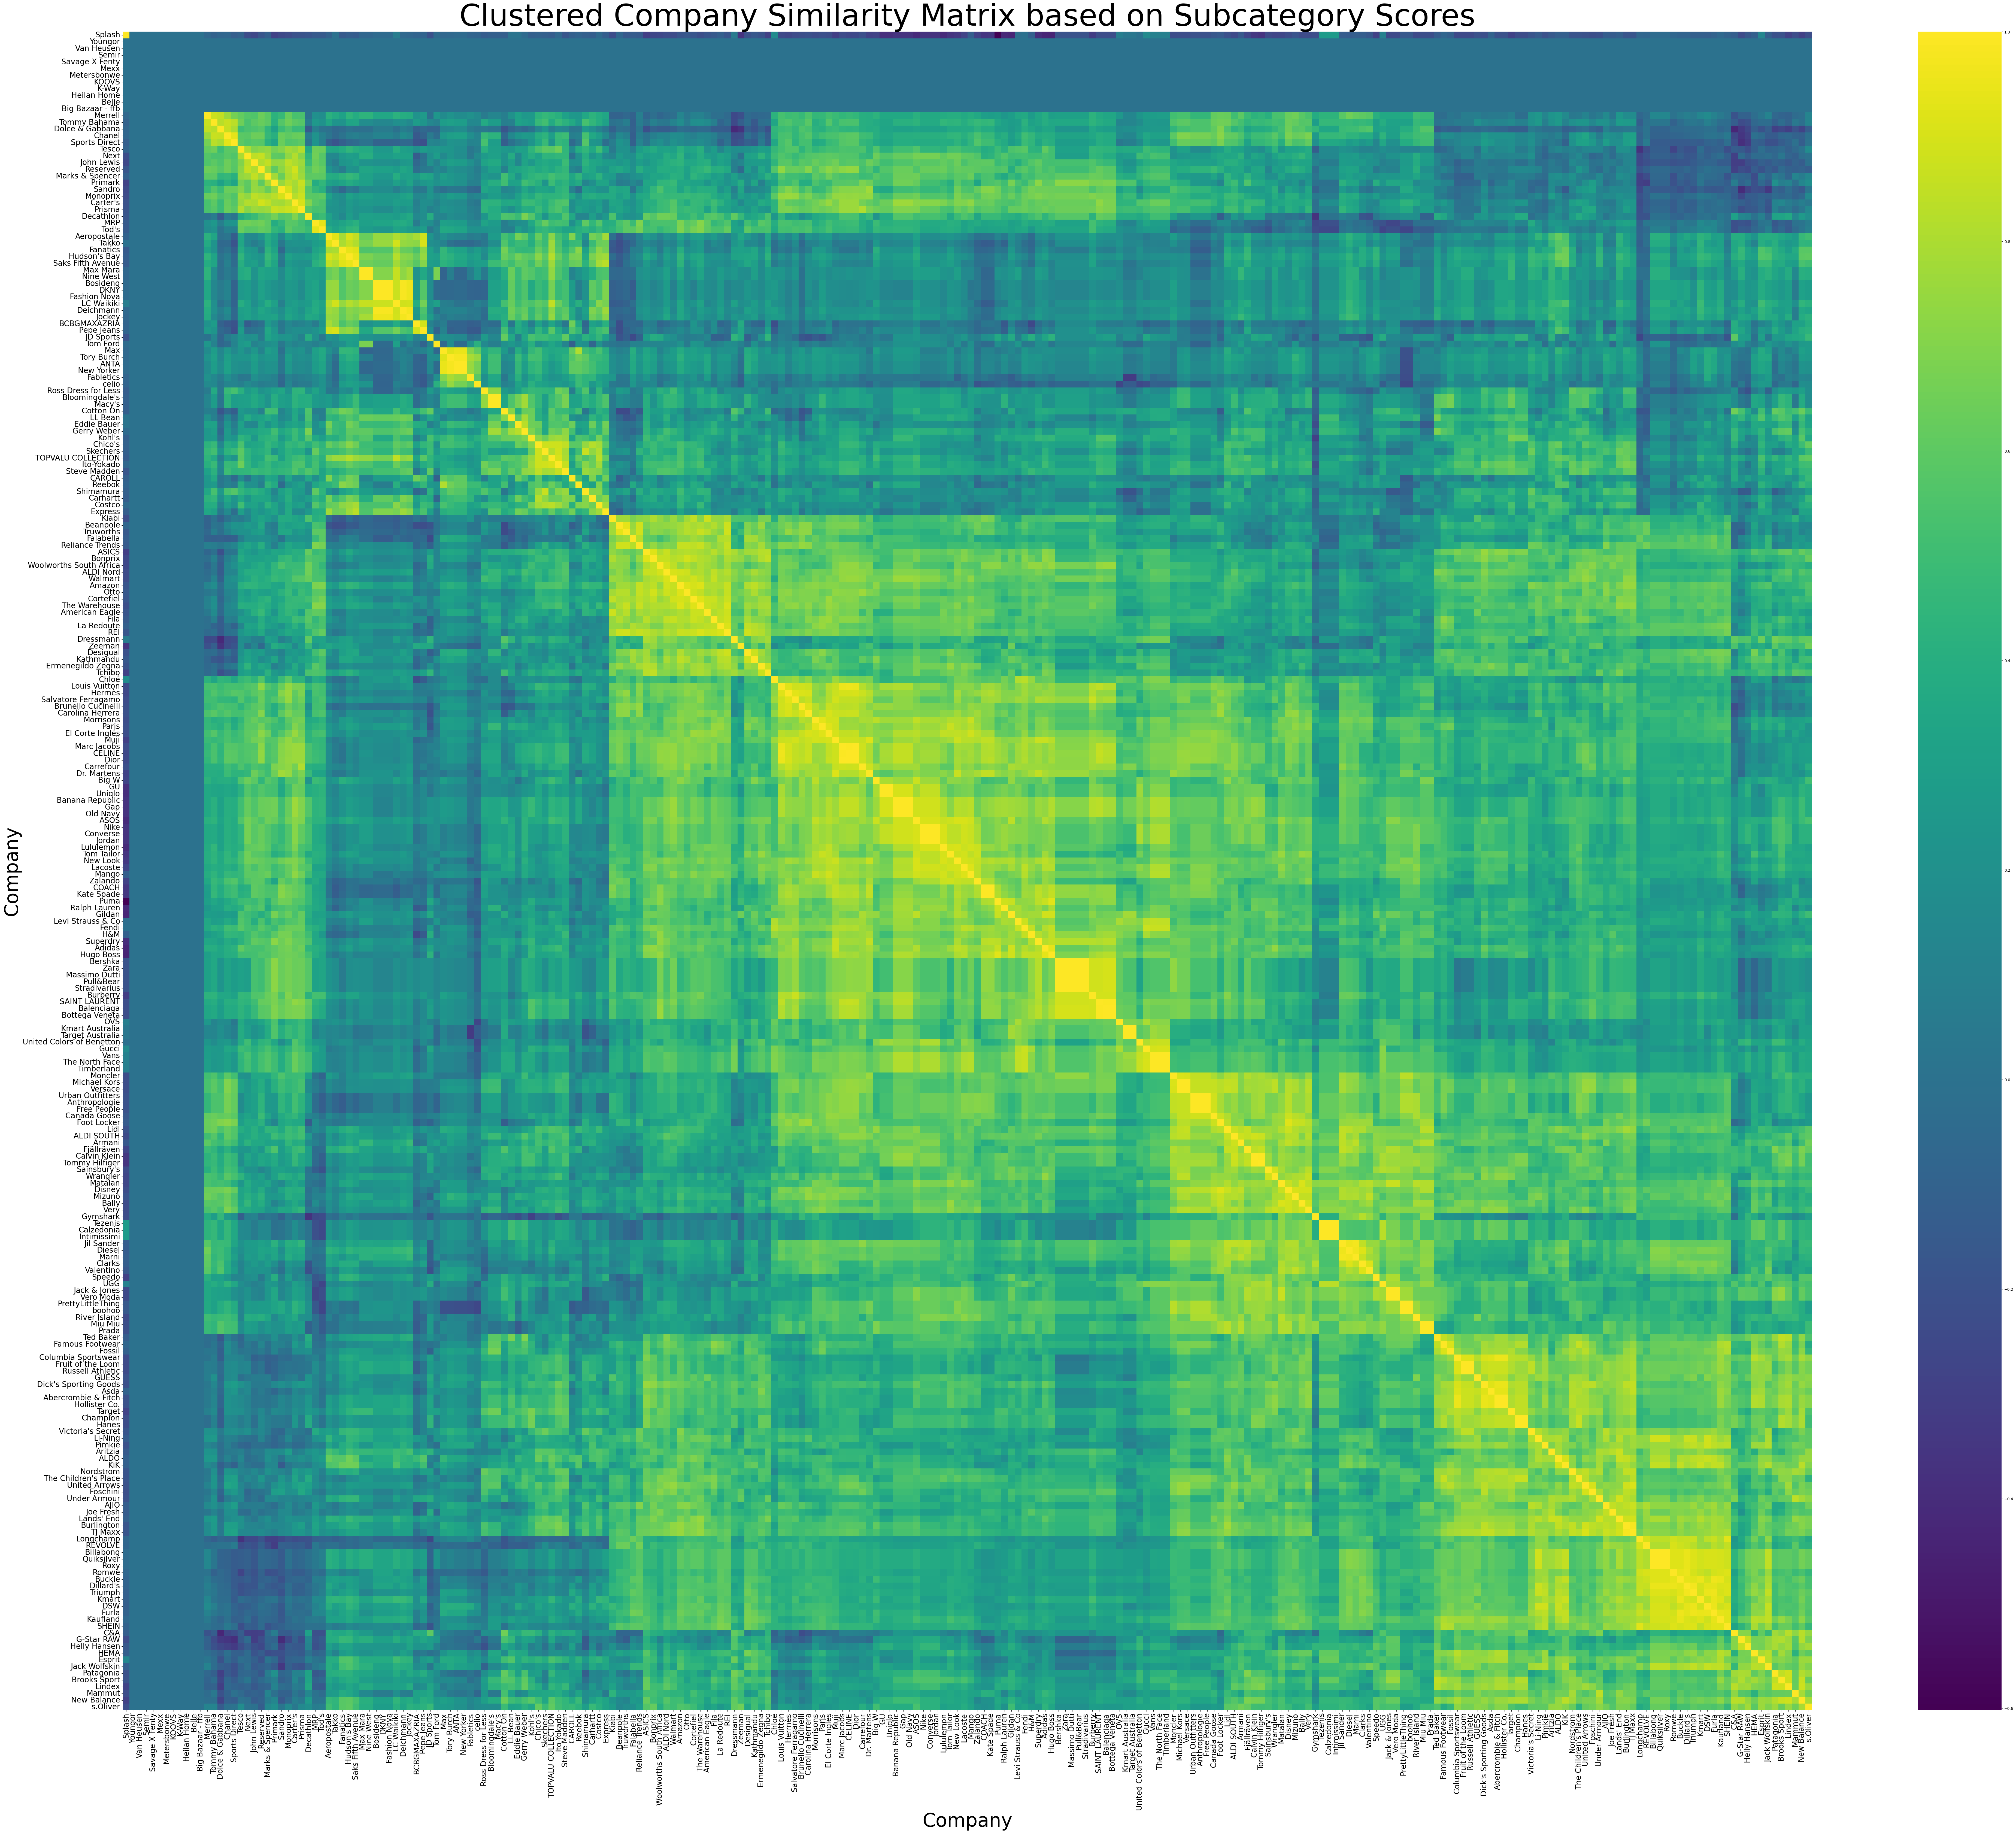

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

pivot_df = df.pivot_table(index='subcategory', columns='company', values='normalized')
similarity_matrix = pivot_df.corr()
if similarity_matrix.isnull().values.any():
    similarity_matrix.fillna(0, inplace=True)
linkage_matrix = linkage(similarity_matrix, method='ward')

dendro = dendrogram(linkage_matrix, labels=similarity_matrix.index, no_plot=True)
reordered_labels = dendro['ivl']
reordered_matrix = similarity_matrix.loc[reordered_labels, reordered_labels]
plt.figure(figsize=(100, 80))
ax = sns.heatmap(reordered_matrix, annot=False, cmap='viridis', fmt=".2f", xticklabels=reordered_labels, yticklabels=reordered_labels)
plt.title('Clustered Company Similarity Matrix based on Subcategory Scores', fontsize=80)
plt.xlabel('Company', fontsize=50)
plt.ylabel('Company', fontsize=50)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()